# PyTorch workflow



In [65]:
import numpy as np
import torch
from torch import nn  # nn contains py torch's building block for  nueral network.
import matplotlib.pyplot as plt
torch.__version__  #version
from pathlib import Path

## Data preparing and loading

Data can be anything in machine learning
* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine learning is in two parts:
1. Numerical representation of data
2. Build a model to learn patterns in that numerical representations


#### Creating a linear regression data



In [66]:
# creating a linear regression data, later it will be used to train ml model
weight = 0.7
bias = 0.3

# Creating the data
start = 0
end = 1
step = 0.02

Y= torch.arange(start, end, step)
print(Y.shape)

X = torch.arange(start, end, step).unsqueeze(dim=1)  # unsqueeze returns a tensor with one dimension added at the specified location.
#the underlying data remains the same, one dimension is added
print(X.shape)

y = weight * X + bias

print(X[:10], y[:10])
print(len(X), len(y))






torch.Size([50])
torch.Size([50, 1])
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


In [67]:
X.shape

torch.Size([50, 1])

In [68]:
X[:5,0]

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800])

## Splitting Data

In [69]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]  # from start to train_split

X_test, y_test = X[train_split:], y[train_split:]  #from train_split to the end

len(X_train) , len(X_test)

(40, 10)

In [70]:
#practice squeeze and unsqueeze
# print(x)
# print(x.shape)
# print(torch.unsqueeze(x,1))
# print(torch.unsqueeze(x,1).shape)
# print(x)
# print(x.shape)
# print(torch.unsqueeze(x,0))
# print(torch.unsqueeze(x,0).shape)

#### Visualize the data

In [71]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue

  plt.scatter(train_data, train_labels,c='b', s=3, label = 'Training data')

  #plot test data in green

  plt.scatter(test_data,test_labels, c='g', s=3 , label = 'Testing data')

  #if predictions are given to the function in the parameters
  if predictions is not None:
    #plot the  predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=3, label = 'Predictions')

  #showing the legend
  plt.legend(prop={"size":14});


  


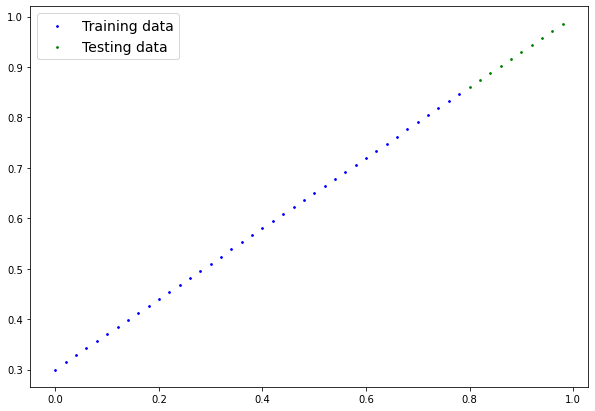

In [72]:
plot_predictions()

## Build Model
 Building a linear regression model class.

What the model does:
* Start with random values(weight and bias)
* Look at training data and adjust the random values to better represent the ideal value

How will it do it:Through 2 main alogorithms:
 Two methods:  
 1. Gradient descent
 2. Back propogation  



In [73]:
#creating a linear regression model class
"""
    --class LinearRegressionModel inherits from nn.Module, almost everthing inherits from nn.Module
    --nn.Module is a base class for all neural  network modules in PyTorch and provides common functionality such as 
    keeping track of the model's parameters, applying the model to input data, and performing backpropagation to compute gradients.
    """
class LinearRegressionModel(nn.Module): 
  #initialize model parameters
  def __init__(self): # the init function is automatically called when the object of the class is made # this intializes the attributes of the object
    super().__init__() # super function returns an object that represents a parent class, super function is used to inherit the propertoes of the parent
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True, 
                                            dtype = torch.float))  #randn function creates a tensor filled with random numbers that  follow standard normal distribution i.e mean 0 and variance of 1   
    #parameter creates a tensor that learns during training to optimize the performance
    
    #parameter for bias
    self.bias =  nn.Parameter(torch.rand(1,
                                         requires_grad = True,
                                         dtype = torch.float))
    
    #Forward method to define the computation in the model

  def forward(self, x:torch.Tensor) -> torch.Tensor:  #<- x is input data
    return self.weights * x + self.bias # this is the linear regression formuls                                                        

* torch.nn - is a module that contains all the building blocks for computational graphs. a neural network is considered a computaional graph

* torch.nn.Module - it is the base class for all neural network modules, if we subclass it we should overwrite forward()

* torch.nn.Parameter - A kind of Tensor that is to be considered a module parameter. what parameters should our model try and learn, often a Pytorch layer from torch.nn will set for us .. nn.Parameter - for self.weights and self.bias - creates a tensor of a random value , and this is standard normalised distributed.which means it has a mean of 0 and variance of 1

* torch.optim - 

* def forward() - aLL nn.Module subclassed require to be 

In [74]:
torch.randn(1,requires_grad=True, dtype=torch.float)

tensor([0.3367], requires_grad=True)

## Checking contents of PyTorch model

using .parameters()

In [75]:
#creating a random seeed
torch.manual_seed(42)

#Creating an instance of our model

model_0 = LinearRegressionModel()

#checking parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

- torch.nn is a module that provides building blocks to make a neural network
- torch.nn.Module - is the base class for building neural network for all neural networks.

- torch.nn.Parameters - it a tensor , that we have to improve or change to reach our desired values
This desired value is obtained though use of back propagation and gradient descent.
We start with random values for the parameter and through the BP, GD and actual label class we reach near to the desired values.

## Inference

In [76]:
with torch.inference_mode():    #with inference mode, gradient tracking is off, since in inference we do donot need gradient, only in training gradient is required,
# with inference mode predictions are faster since it is not keeping track of un necssary things like gradient
# saving memory
  y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [77]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

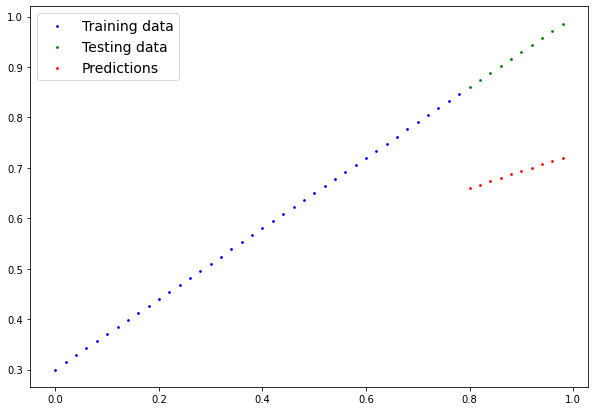

In [78]:
plot_predictions(predictions=y_preds)

## 3. Training model

- By training a model we will move from unknwon parameters(random) to known parameters.  

Better representation  of data from a poor representation of data 

* We will  measure the good or bad  representation of data- through a loss function-

Loss function is also called cost function or also called criterion

* Optimizer takes into account the loss of the model and adjust the model's parameter(eg. weight and bias). Optimizer adjusts the parameters to minimise the loss.

  * In the optimizer we set two parameters   
  a. `param` - the parameters we want to optimize.  
  b. `lr` - the learning rate tell us how big or small the optimizers changes the parameters with each step.(small lr small changes, big lr big changes). It is a hyperparameter. 


Note: Hyper parameter is set by the user. Parameter is set by the model




In [79]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [80]:
model_0.state_dict()   #returns parameters along with name

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

### Setting up a loss  function and optimizer


In [81]:
loss_fn = nn.L1Loss()         # setting loss function

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)   #setting optimizer, stochasttic gradient descent
                            #lr is learning rate

### Building a training and a testing loop 

Things required in a training loop:

0. Loop through the data....
1. Forward pass (data moving though model's forward() )to make predictions - also called forward propagation.
2. Calculate the loss(compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the netwok to calculate the gradients of each of the parameters of our model with respect to the loss.(**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.(**gradient descent**)



gradient is the slope. we are trying to go downhill. machine learning model goes downhil. height is the loss. as we take a step downhill the height is reduced so is the gradient. at the end gradient and loss is zero.

In [82]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [83]:
#setting up training loop
# torch.manual_seed(42)

#one epoch is one loop through the data 1 to step 5(hyperparameter we set ourlseves)
epochs = 200

#Tracking experiments
epoch_count = []
loss_values = []
test_loss_values = []

### training
for epoch in range(epochs):   #one epoch is one single pass through the data

  #set the model to training mode
  model_0.train()  #train mode in PyTorch sets all the parameters that require gradients to require gradients.
  #sets up behind the scenes like track the gradient, etc etc

  #1. forward pass
  y_pred = model_0(X_train)  #we perform forward pass on the training data.
  #this will perform forward() method located within the model object

  #2.calculate loss 
  loss = loss_fn(y_pred,y_train)   # how wrong the model's predictions are
  # print (f"loss: {loss}")

  #3. Optimizer zero grad set the optimizer to zero. we donot want past collected gradient values. this resets the values.
  optimizer.zero_grad() #resets optimizer gradient  , fresh for every new forward pass

  #4. Back propagation on the loss wrt to parameters of the model
  loss.backward()  #performs backpropagation on loss function (compute the gradient of every parameter with reqires_grad =True)

  #5. optimizer(gradient descent)
  optimizer.step()  #updates the models's parameter with respect to gradients calculate by loss.backward()
  
  ##Testing
  model_0.eval() #turns off settings in the model that is not required for evaluation(batch norm/dropout)
  with torch.inference_mode():  #turns of gradient tracking and more things behind the scenes
    #1. Forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch %10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)


    print(f"Epoch:{epoch} | Loss:{loss}| Test loss:{test_loss}")

    #Print out mode state_ict()
    print(model_0.state_dict())






Epoch:0 | Loss:0.08169572055339813| Test loss:0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch:10 | Loss:0.06808149069547653| Test loss:0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch:20 | Loss:0.06258393079042435| Test loss:0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch:30 | Loss:0.05879194289445877| Test loss:0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch:40 | Loss:0.05530194193124771| Test loss:0.13084018230438232
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch:50 | Loss:0.051822252571582794| Test loss:0.12050700187683105
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch:60 | Loss:0.04838593676686287| Test loss:0.11223447322845459
OrderedDict([('weights', tensor([0.4610])), ('bias', tensor([0.4004]))])
Epoch:70 | Loss:0.0449

In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

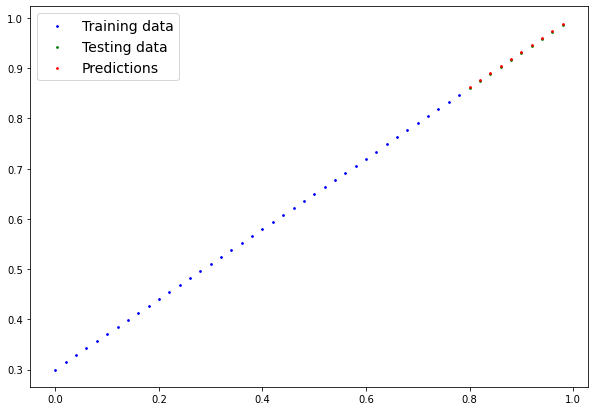

In [85]:
with torch.inference_mode():
  pred = model_0(X_test)
plot_predictions(predictions=pred)

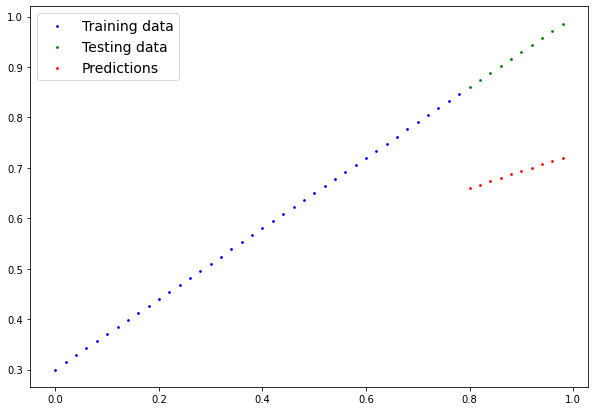

In [86]:
plot_predictions(predictions=y_preds)

In [87]:
np.array(torch.tensor(loss_values).numpy())

array([0.08169572, 0.06808149, 0.06258393, 0.05879194, 0.05530194,
       0.05182225, 0.04838594, 0.04494876, 0.04152032, 0.03808232,
       0.03464684, 0.03121751, 0.02777871, 0.0243449 , 0.0209139 ,
       0.01747509, 0.01404297, 0.01061027, 0.00717147, 0.00374104],
      dtype=float32)

In [88]:
test_loss_values

[tensor(0.2266),
 tensor(0.1807),
 tensor(0.1563),
 tensor(0.1419),
 tensor(0.1308),
 tensor(0.1205),
 tensor(0.1122),
 tensor(0.1046),
 tensor(0.0964),
 tensor(0.0881),
 tensor(0.0805),
 tensor(0.0722),
 tensor(0.0640),
 tensor(0.0564),
 tensor(0.0481),
 tensor(0.0398),
 tensor(0.0323),
 tensor(0.0240),
 tensor(0.0157),
 tensor(0.0081)]

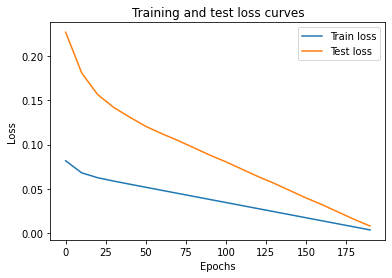

In [89]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model

3 methods to save and load models in PyTorch.

1. torch.save - allows to store PyTorch object in pickle format

2. torch.load() - allows to load a saved PyTorch object.

2. torch.nn.Module.load_state_dict() - this allows to load a model's saved dictionary


https://pytorch.org/tutorials/beginner/saving_loading_models.html#what-is-a-state-dict

In [90]:
# saving a model

#1. Create models directory
MODEL_PATH = Path('models') # save all files to model
MODEL_PATH.mkdir(parents =True, exist_ok =True)

#2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pt'  #py torch have file extension saved as 'pt' or 'pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#saving model state dic

print(f"Saving model to:{MODEL_SAVE_PATH} ")
torch.save(model_0.state_dict(),MODEL_SAVE_PATH)


Saving model to:models/01_pytorch_workflow_model_0.pt 


## Loading a PyTorch saved dict()

We saved the model state_dict(). We will create a new instance of out model class and load state_dict() into that

In [91]:
# loading a model
loaded_dict = torch.load(MODEL_SAVE_PATH)
loaded_dict

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [92]:
# create a new object of model class
loaded_model_0 = LinearRegressionModel()

#loading the saved state_dict() to the new object of the model created
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [93]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [94]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

## Putting it all together on my own


In [95]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

### Create a device - agnostic code
if we have access to GPU, our code will use it  
If no GPU available the code will use CPU

In [96]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


## 6.1 Data

In [97]:
#creating our dataset
bias = 0.3
weight = 0.7

start = 0
step = 0.02
stop = 1

Y = torch.arange(start=start, end = stop, step = step)

X = Y.unsqueeze(dim = 1)  # adding one dimenstion on the 1st(after zeroth position) postiton

y = X*weight + bias  #target



In [98]:
#split data
train_split = int(0.8*len(X))

#train set
X_train = X[:train_split]
y_train = y[:train_split]

#test set
X_test = X[train_split:]
y_test = y[train_split:]

In [99]:
X_train.shape, X_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

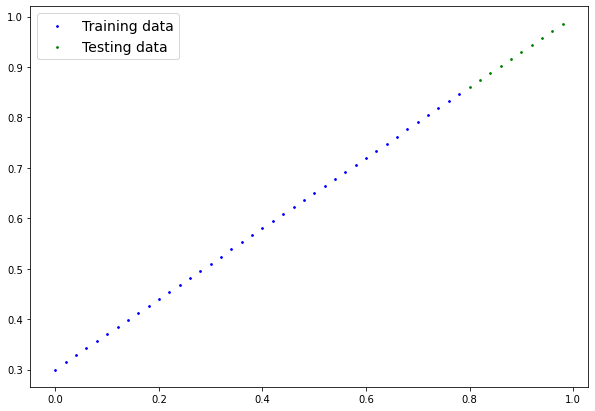

In [100]:
plot_predictions()

## 6.2 Building a PyTorch Linear Model

In [101]:
#building  linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,      
                                  out_features=1)   #in and out feature- one in feature and on eout feature

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set up manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()   


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [102]:
#earlier we had defined the parameterers ourselves, instead now we will initialise layers that have parameter inbuilt in them
#we initailise layer and 

## 6.3 Training the model

for training we need:

* Loss function
* Optimzer
* Training loop
* Testing loop

In [103]:
# check the model current device

next(model_1.parameters()).device

device(type='cpu')

In [104]:
# set the model to target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [105]:
### setup the loss function

loss_fn = nn.L1Loss()  #MAE

#setup out optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.01)

In [106]:
from torch.autograd.grad_mode import inference_mode
# set up a training loop

torch.manual_seed(42)

epochs = 200

#putting data on target device(device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)

for epoch in range(epochs):
  model_1.train()

  #1.forward pass
  y_pred = model_1(X_train)

  #2. calcultate loss
  loss = loss_fn(y_pred,y_train)

  #3. optimzer zero grad
  optimizer.zero_grad()

  #4. do backpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print 

  if epoch %10 == 0:
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss:{test_loss}")



Epoch: 0 | Loss:0.5551779866218567 | Test loss:0.5739762187004089
Epoch: 10 | Loss:0.4399680495262146 | Test loss:0.4392663538455963
Epoch: 20 | Loss:0.3247582018375397 | Test loss:0.30455657839775085
Epoch: 30 | Loss:0.20954827964305878 | Test loss:0.16984674334526062
Epoch: 40 | Loss:0.09433844685554504 | Test loss:0.03513689711689949
Epoch: 50 | Loss:0.023886386305093765 | Test loss:0.04784906655550003
Epoch: 60 | Loss:0.0199567973613739 | Test loss:0.04580312222242355
Epoch: 70 | Loss:0.016517987474799156 | Test loss:0.0375305712223053
Epoch: 80 | Loss:0.013089170679450035 | Test loss:0.029944902285933495
Epoch: 90 | Loss:0.009653178043663502 | Test loss:0.02167237363755703
Epoch: 100 | Loss:0.006215679459273815 | Test loss:0.014086711220443249
Epoch: 110 | Loss:0.002787243574857712 | Test loss:0.005814164876937866
Epoch: 120 | Loss:0.0012645035749301314 | Test loss:0.013801807537674904
Epoch: 130 | Loss:0.0012645035749301314 | Test loss:0.013801807537674904
Epoch: 140 | Loss:0.001

In [107]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [108]:
weight,bias

(0.7, 0.3)

## Making and evaluating predictios

In [109]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds



tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

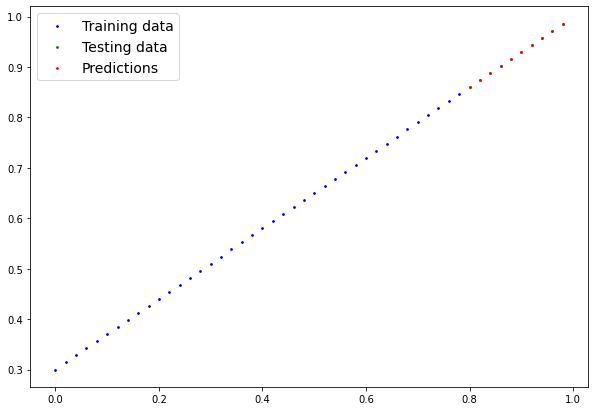

In [110]:
#visualising

plot_predictions(predictions=y_preds)

## 6.5 Saving and loading

In [116]:
#create model folder
MODEL_PATH = Path('models')   #naming a folder and its path 

MODEL_PATH.mkdir(parents=True, exist_ok=True)  #creating a folder

#model save path

MODEL_NAME = '01_pytorch_workflow_model_1.pt'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

In [122]:
## loading a model

#create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

#load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put the loaded model to respective device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [123]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [126]:
#Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)


loaded_model_1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])